Исследование на стационарность

ADF Statistic: -2.927646128501066
p-value: 0.0422262900878155
Critical Values:
   1%: -3.44911857009962
   5%: -2.8698097654570507
   10%: -2.5711757061225153
Ряд 'Концентрат коксующегося угля_Россия марка Ж+ГЖ FCA руб./т, без НДС' стационарен (отвергаем нулевую гипотезу)


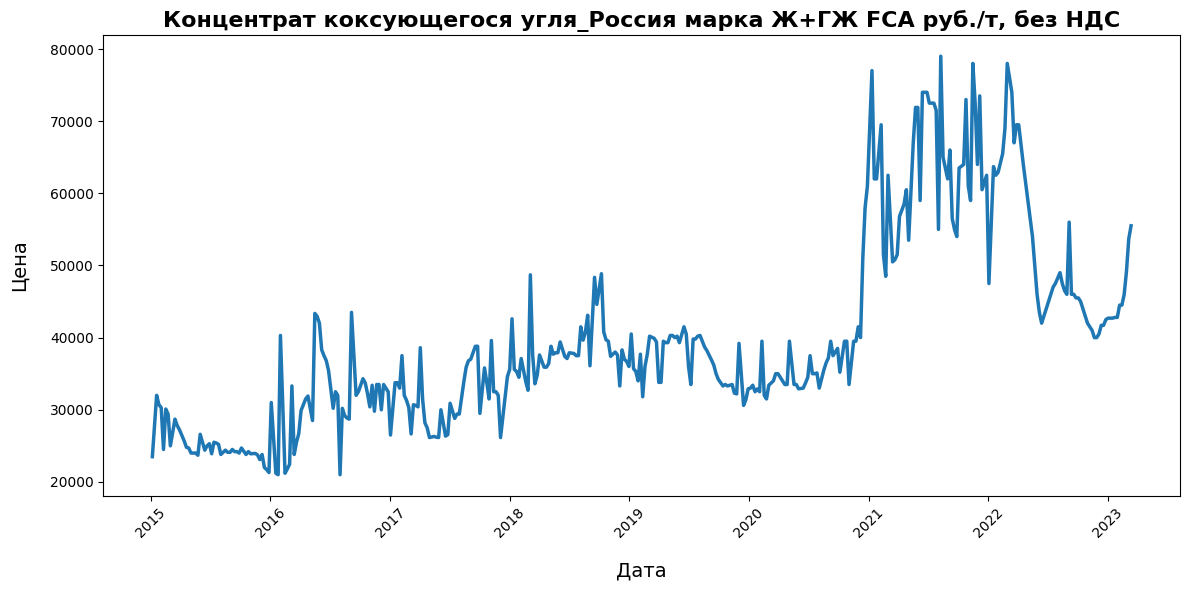

ADF Statistic: -3.0623525329996593
p-value: 0.029467650171594344
Critical Values:
   1%: -3.4490648539347544
   5%: -2.8697861692116478
   10%: -2.5711631253228306
Ряд 'Концентрат коксующегося угля_Средняя шихта Россия FCA руб./т, без НДС' стационарен (отвергаем нулевую гипотезу)


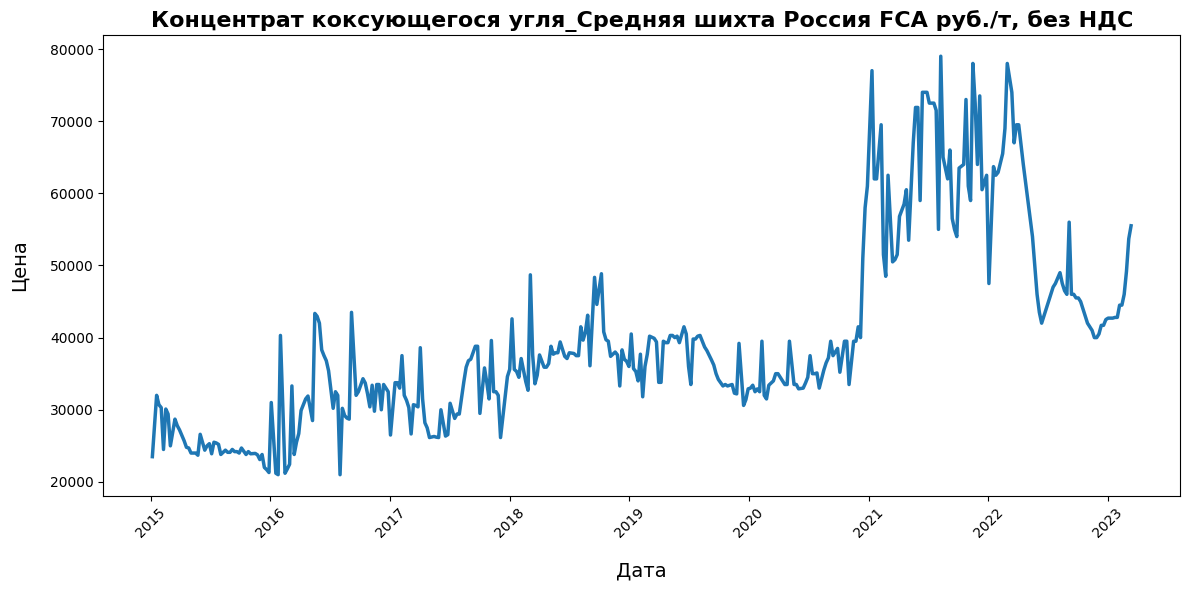

ADF Statistic: -3.148858112583127
p-value: 0.023142474896558723
Critical Values:
   1%: -3.44911857009962
   5%: -2.8698097654570507
   10%: -2.5711757061225153
Ряд 'Концентрат коксующегося угля_Россия марка ГЖ FCA руб./т, без НДС' стационарен (отвергаем нулевую гипотезу)


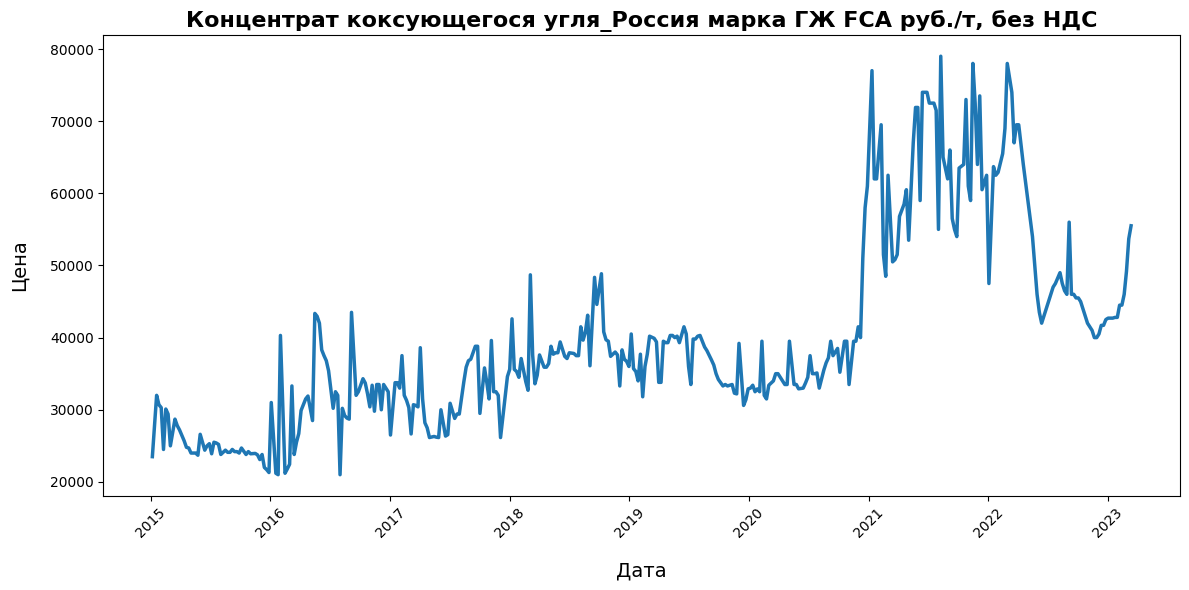

In [5]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("df_merged_cleaned.csv")
data['dt'] = pd.to_datetime(data['dt'])
data.set_index('dt', inplace=True)

for column in data.columns[1:]:
    # Проведение теста Дики-Фуллера
    result = adfuller(data[column])
    
    # Интерпретация результата
    if result[1] < 0.05:
        print('ADF Statistic:', result[0])
        print('p-value:', result[1])
        print('Critical Values:')
        for key, value in result[4].items():
            print(f'   {key}: {value}')
        print(f"Ряд '{column}' стационарен (отвергаем нулевую гипотезу)")

        # Выводим стационарный ряд
        plt.figure(figsize=(12, 6))  # размер графика
        sns.lineplot(x='dt', y=data.columns[-1], data=data, linewidth=2.5)

        # Настройки заголовка и меток
        plt.title(column, fontsize=16, fontweight='bold')
        plt.xlabel('Дата',labelpad=15, fontsize=14)
        plt.ylabel('Цена',labelpad=15, fontsize=14)
        plt.xticks(rotation=45)  # поворот меток по оси X
        plt.tight_layout()  # улучшение размещения элементов на графике

        plt.show()
